In [1]:
# Unpack tesselate
!tar -zxf /home/jupyter/examples/tesselate/src/tesselate-0.1.tar.gz -C /home/jupyter/examples/tesselate/src/
# Add package to python path.
import sys
sys.path.append('/home/jupyter/examples/tesselate/src/tesselate-0.1')
# Import tesselate.
import tesselate as ts
# Authenticate by logging in or setting token manually.
# ts.client.authenticate('daniel', '***')
ts.client.set_token('b1aef2291f5296eecc98266e55efd106577eb5ee')

### Search for a region (aggregationlayer)

In [2]:
import json
# Search for regions
regions = ts.region(search='Ethiopia')
print(json.dumps(regions, indent = 2))
# Keep ethiopia
ethiopia = regions[0]

[
  {
    "aggregationareas": [
      1420
    ],
    "min_zoom_level": 0,
    "id": 74,
    "extent": [
      35.84607600776938,
      11.392510283713559,
      35.87258211283826,
      11.41945303141402
    ],
    "description": "",
    "name": "Ethiopia Land",
    "nr_of_areas": 1,
    "max_zoom_level": 18
  }
]


### Search for composite

In [3]:
composites = ts.composite(year='2018')
print(json.dumps(composites, indent = 2))
# Keep March 2018
march_2018 = composites[2]

[
  {
    "name": "January 2018",
    "min_date": "2018-01-01",
    "active": true,
    "start_week": 1,
    "compositeband_set": [
      281,
      282,
      283,
      284,
      285,
      286,
      287,
      288,
      289,
      290,
      291,
      292,
      293
    ],
    "max_date": "2018-01-31",
    "id": 53,
    "sentineltiles": [],
    "interval": "Monthly",
    "rasterlayer_lookup": {
      "B06.jp2": 3306,
      "B03.jp2": 3303,
      "B11.jp2": 3312,
      "B04.jp2": 3304,
      "B8A.jp2": 3309,
      "B01.jp2": 3301,
      "B08.jp2": 3308,
      "B07.jp2": 3307,
      "B10.jp2": 3311,
      "B05.jp2": 3305,
      "B12.jp2": 3313,
      "B02.jp2": 3302,
      "B09.jp2": 3310
    },
    "official": true,
    "max_cloudy_pixel_percentage": 90.0
  },
  {
    "name": "February 2018",
    "min_date": "2018-02-01",
    "active": true,
    "start_week": 5,
    "compositeband_set": [
      1,
      2,
      3,
      4,
      5,
      6,
      7,
      8,
      9,
      10,
 

### Search for a formula

In [4]:
# Get NDVI formulas.
formulas = ts.formula(search='NDVI')
print(json.dumps(formulas, indent = 2))
# Keep regular NDVI
ndvi = formulas[0]

# Get RGB formula
rgb = ts.formula(search='RGB')[0]

[
  {
    "id": 1,
    "acronym": "NDVI",
    "description": "",
    "color_palette": "RdYlGn",
    "breaks": 0,
    "formula": "(B8 - B4) / (B8 + B4)",
    "name": "Natural Difference Vegetation Index",
    "max_val": 1.0,
    "min_val": -1.0
  },
  {
    "id": 3,
    "acronym": "NDVI+",
    "description": "Vegetation as measured by positive NDVI scores.",
    "color_palette": "Greens",
    "breaks": 1,
    "formula": "((B8 - B4) / (B8 + B4)) * (B3 < 1500)",
    "name": "Positive Clear NDVI",
    "max_val": 0.75,
    "min_val": 0.25
  }
]


### Export data into files on disk

In [5]:
# Set data directory.
base_path = '/home/jupyter/examples/tesselate/data'
# Export NDVI
ts.export(ethiopia, march_2018, ndvi, base_path)
# Export RGB
ts.export(ethiopia, march_2018, rgb, base_path)

INFO: Processing "Natural Difference Vegetation Index" over "Ethiopia Land" for "March 2018"
INFO: Processing "Visual Bands" over "Ethiopia Land" for "March 2018"


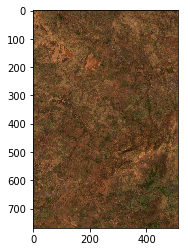

In [7]:
# Plot exported data.
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread(os.path.join(base_path, 'rgb.tif'))
plt.imshow(img)

### Compute aggregation values for

In [11]:
aggregates = []
for area_id in ethiopia['aggregationareas']:
    area = ts.area(area_id)
    aggregates.append(ts.aggregate(area, march_2018, ndvi))
print(json.dumps(aggregates, indent = 2))

[
  {
    "rasterlayers": [
      17950,
      17946
    ],
    "zoom": 14,
    "name": "Analysis Area",
    "status": "Finished",
    "std": 0.0807901053327329,
    "avg": 0.306388602254788,
    "formula": "(B8-B4)/(B8+B4)",
    "value": {
      "(0.5301720883552626, 0.5966340413908251)": 562.0,
      "(0.4637101353197001, 0.5301720883552626)": 1543.0,
      "(0.1978623231774502, 0.2643242762130127)": 17685.0,
      "(0.5966340413908251, 0.6630959944263877)": 223.0,
      "(0.72955794746195, 0.7960199004975125)": 23.0,
      "(0.33078622924857515, 0.39724818228413766)": 11537.0,
      "(0.1314003701418877, 0.1978623231774502)": 2340.0,
      "(0.39724818228413766, 0.4637101353197001)": 4948.0,
      "(0.6630959944263877, 0.72955794746195)": 85.0,
      "(0.2643242762130127, 0.33078622924857515)": 19015.0
    },
    "units": "",
    "aggregationarea": 1420,
    "id": 1486,
    "psum": 17758.5897752898,
    "psumsq": 5819.34332960462,
    "pcount": 57961.0,
    "min": 0.131400370141888,

### Compute regional aggregates

In [13]:
# This is a dummy example with only one aggregation area.
# However, this function takes a list of value count results
# and returns the regional statistics.
ts.regional_aggregate(aggregates)

{'max': 0.796019900497512,
 'mean': 0.3063886022547886,
 'min': 0.131400370141888,
 'std': 0.08079010533272946}